# Results Summary

## Setup

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_fm = pd.read_pickle("outputs/results_fm.pkl")
results_fm

,RMSE,Loss,Model,t
0,3.506912,MSE,XGB,2023-05-17 02:22:00
1,3.623817,MSE,XGB,2023-05-19 02:22:00
2,2.702623,MSE,XGB,2023-05-21 02:22:00
3,2.840114,MSE,XGB,2023-05-23 02:22:00
4,3.919041,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,4.311108,ROS,RF,2024-04-05 02:22:00
163,3.800491,ROS,RF,2024-04-07 02:22:00
164,3.653255,ROS,RF,2024-04-09 02:22:00
165,4.516945,ROS,RF,2024-04-11 02:22:00


In [3]:
results_ros = pd.read_pickle("outputs/results_ros.pkl")
results_ros

,RMSE,Loss,Model,t
0,0.005242,MSE,XGB,2023-05-17 02:22:00
1,0.006047,MSE,XGB,2023-05-19 02:22:00
2,0.004678,MSE,XGB,2023-05-21 02:22:00
3,0.006099,MSE,XGB,2023-05-23 02:22:00
4,0.006977,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,0.007323,ROS,RF,2024-04-05 02:22:00
163,0.005849,ROS,RF,2024-04-07 02:22:00
164,0.006606,ROS,RF,2024-04-09 02:22:00
165,0.008086,ROS,RF,2024-04-11 02:22:00


In [4]:
# Note, 167*3*12=6012
print(f"Total Time Periods: {len(results_ros.t.unique())}")
print(f"Earliest Train Start Time: {results_ros.t.min()}")
print(f"Latest Train Start Time: {results_ros.t.max()}")
print(f"Total Loss Functions: {len(results_ros.Loss.unique())}")
print(f"Total Models: {len(results_ros.Model.unique())}")
print(f"Total RMSE Calculations: {results_ros.shape[0]}")

Total Time Periods: 167
Earliest Train Start Time: 2023-05-17 02:22:00
Latest Train Start Time: 2024-04-13 02:22:00
Total Loss Functions: 12
Total Models: 3
Total RMSE Calculations: 6012


In [5]:
pd.options.display.float_format = '{:.3e}'.format

In [6]:
tab1 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,7.119e-03,3.039e-03,1.562e-02
1,exp_0.01,7.105e-03,3.057e-03,1.524e-02
2,exp_0.0367,7.074e-03,3.044e-03,1.566e-02
3,exp_0.0633,7.080e-03,2.844e-03,1.651e-02
4,exp_0.09,7.118e-03,3.127e-03,1.648e-02
5,exp_0.1167,7.164e-03,3.062e-03,1.615e-02
6,exp_0.1433,7.259e-03,3.093e-03,1.690e-02
7,exp_0.17,7.374e-03,3.121e-03,1.759e-02
8,exp_0.1967,7.531e-03,3.100e-03,1.821e-02
9,exp_0.2233,7.690e-03,3.146e-03,1.876e-02


In [7]:
print(tab1.to_latex(float_format='%.3e'))

\begin{tabular}{llrrr}
\toprule
 & Loss & Mean & Min & Max \\
\midrule
0 & MSE & 7.119e-03 & 3.039e-03 & 1.562e-02 \\
1 & exp_0.01 & 7.105e-03 & 3.057e-03 & 1.524e-02 \\
2 & exp_0.0367 & 7.074e-03 & 3.044e-03 & 1.566e-02 \\
3 & exp_0.0633 & 7.080e-03 & 2.844e-03 & 1.651e-02 \\
4 & exp_0.09 & 7.118e-03 & 3.127e-03 & 1.648e-02 \\
5 & exp_0.1167 & 7.164e-03 & 3.062e-03 & 1.615e-02 \\
6 & exp_0.1433 & 7.259e-03 & 3.093e-03 & 1.690e-02 \\
7 & exp_0.17 & 7.374e-03 & 3.121e-03 & 1.759e-02 \\
8 & exp_0.1967 & 7.531e-03 & 3.100e-03 & 1.821e-02 \\
9 & exp_0.2233 & 7.690e-03 & 3.146e-03 & 1.876e-02 \\
10 & exp_0.25 & 7.889e-03 & 3.165e-03 & 1.925e-02 \\
11 & ROS & 7.040e-03 & 3.032e-03 & 1.571e-02 \\
\bottomrule
\end{tabular}



In [8]:
min_ros = tab1.Mean.argmin()
print(tab1.Loss[min_ros])
(tab1.Mean[0] - tab1.Mean[min_ros]) / tab1.Mean[0]

ROS


0.011040183678247929

In [9]:
min_ros

11

In [10]:
print(f"Percent Reduction in RMSE for ROS from Best Exp. Loss: {100*(results_ros[results_ros.Loss == 'MSE'].RMSE.mean()- results_ros[results_ros.Loss == 'exp_0.0367'].RMSE.mean())/results_ros[results_ros.Loss == 'MSE'].RMSE.mean()}")

Percent Reduction in RMSE for ROS from Best Exp. Loss: 0.6223551753040868


In [11]:
print(f"Percent Reduction in RMSE for ROS from ROS Loss: {100*(results_ros[results_ros.Loss == 'MSE'].RMSE.mean()- results_ros[results_ros.Loss == 'ROS'].RMSE.mean())/results_ros[results_ros.Loss == 'MSE'].RMSE.mean()}")

Percent Reduction in RMSE for ROS from ROS Loss: 1.1040183678247808


In [12]:
pd.options.display.float_format = None

In [13]:
tab2 = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,4.00,1.60,8.59
1,exp_0.01,4.00,1.60,8.59
2,exp_0.0367,4.00,1.42,8.79
3,exp_0.0633,4.04,1.55,9.26
4,exp_0.09,4.09,1.50,9.60
5,exp_0.1167,4.16,1.45,10.23
6,exp_0.1433,4.25,1.46,10.74
7,exp_0.17,4.36,1.38,11.18
8,exp_0.1967,4.49,1.38,11.53
9,exp_0.2233,4.62,1.31,11.82


In [14]:
#print(tab2.to_latex())

### Results by Model

In [15]:
tab1 = results_ros[results_ros.Model == "XGB"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,0.006703,0.003039,0.014973
1,exp_0.01,0.006677,0.003057,0.015242
2,exp_0.0367,0.006673,0.003044,0.015665
3,exp_0.0633,0.006686,0.002844,0.016506
4,exp_0.09,0.006703,0.003127,0.016481
5,exp_0.1167,0.006732,0.003062,0.015858
6,exp_0.1433,0.006797,0.003093,0.015830
7,exp_0.17,0.006860,0.003121,0.016255
8,exp_0.1967,0.007021,0.003100,0.016986
9,exp_0.2233,0.007158,0.003146,0.016099


In [16]:
tab2 = results_fm[results_ros.Model == "XGB"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,3.83,1.60,8.59
1,exp_0.01,3.82,1.60,8.59
2,exp_0.0367,3.81,1.42,8.79
3,exp_0.0633,3.84,1.55,9.26
4,exp_0.09,3.85,1.50,9.28
5,exp_0.1167,3.89,1.45,9.16
6,exp_0.1433,3.95,1.46,9.07
7,exp_0.17,4.02,1.38,8.98
8,exp_0.1967,4.14,1.38,9.27
9,exp_0.2233,4.26,1.31,9.05


In [17]:
tab1 = results_ros[results_ros.Model == "RF"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,0.007005,0.003397,0.013673
1,exp_0.01,0.007038,0.003446,0.013921
2,exp_0.0367,0.007019,0.003548,0.014159
3,exp_0.0633,0.007017,0.003594,0.014346
4,exp_0.09,0.007040,0.003465,0.014515
5,exp_0.1167,0.007028,0.003583,0.014995
6,exp_0.1433,0.007091,0.003574,0.014600
7,exp_0.17,0.007192,0.003533,0.014848
8,exp_0.1967,0.007306,0.003535,0.014803
9,exp_0.2233,0.007447,0.003514,0.014948


In [18]:
tab2 = results_fm[results_ros.Model == "RF"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,4.03,1.84,8.34
1,exp_0.01,4.04,1.79,8.52
2,exp_0.0367,4.04,1.76,8.31
3,exp_0.0633,4.05,1.73,8.29
4,exp_0.09,4.08,1.66,8.45
5,exp_0.1167,4.09,1.59,8.67
6,exp_0.1433,4.15,1.53,8.46
7,exp_0.17,4.24,1.47,8.46
8,exp_0.1967,4.33,1.44,8.75
9,exp_0.2233,4.43,1.39,9.37


In [19]:
tab1 = results_ros[results_ros.Model == "LM"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,0.007648,0.003594,0.015618
1,exp_0.01,0.007601,0.003681,0.014968
2,exp_0.0367,0.007531,0.003971,0.014667
3,exp_0.0633,0.007538,0.004196,0.014800
4,exp_0.09,0.007610,0.004019,0.015332
5,exp_0.1167,0.007733,0.003873,0.016151
6,exp_0.1433,0.007891,0.003754,0.016903
7,exp_0.17,0.008071,0.003659,0.017591
8,exp_0.1967,0.008265,0.003587,0.018206
9,exp_0.2233,0.008464,0.003537,0.018758


In [20]:
tab2 = results_fm[results_ros.Model == "LM"].groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,4.13,2.05,7.73
1,exp_0.01,4.12,2.03,7.78
2,exp_0.0367,4.14,1.96,8.08
3,exp_0.0633,4.22,1.91,8.88
4,exp_0.09,4.34,1.85,9.60
5,exp_0.1167,4.49,1.80,10.23
6,exp_0.1433,4.66,1.76,10.74
7,exp_0.17,4.83,1.72,11.18
8,exp_0.1967,5.01,1.68,11.53
9,exp_0.2233,5.17,1.64,11.82


## Significance Tests

### 2-Sample T-Test

Assumes indenpdent samples.

In [21]:
stats.ttest_ind(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=0.3517683209742432, pvalue=0.725086127533763, df=1000.0)

In [22]:
stats.ttest_ind(results_fm[results_fm.Loss == "MSE"].RMSE, results_fm[results_fm.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=-0.01528602475009021, pvalue=0.9878070409113389, df=1000.0)

## Paired T-Test

Calculates t-test for related samples.

In [23]:
# Check that time periods match, should be 1
print(np.mean(results_ros[results_ros.Loss == "MSE"].t == results_fm[results_ros.Loss == "exp_0.0367"].t))
# Check that Models are the same, should be 1
print(np.mean(results_ros[results_ros.Loss == "MSE"].Model == results_fm[results_ros.Loss == "exp_0.0367"].Model))

1.0
1.0


In [24]:
len(results_ros[results_ros.Loss == "MSE"].RMSE)

501

In [25]:
stats.ttest_rel(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=2.3901841326069624, pvalue=0.017209162007957697, df=500)

In [26]:
stats.ttest_rel(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "ROS"].RMSE)

TtestResult(statistic=2.828579173953074, pvalue=0.004863259723063421, df=500)

In [27]:
stats.ttest_rel(results_fm[results_fm.Loss == "MSE"].RMSE, results_fm[results_fm.Loss == "ROS"].RMSE)

TtestResult(statistic=0.1935688618436648, pvalue=0.8465920907094616, df=500)

In [28]:
stats.ttest_rel(results_fm[results_fm.Loss == "MSE"].RMSE, results_fm[results_fm.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=-0.10385529012232748, pvalue=0.9173258318709268, df=500)

## Plots

In [29]:
# grouped = results_ros.groupby('Loss').agg({'RMSE': ['mean', 'sem']}).reset_index()
# grouped

grouped = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()
grouped2 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()

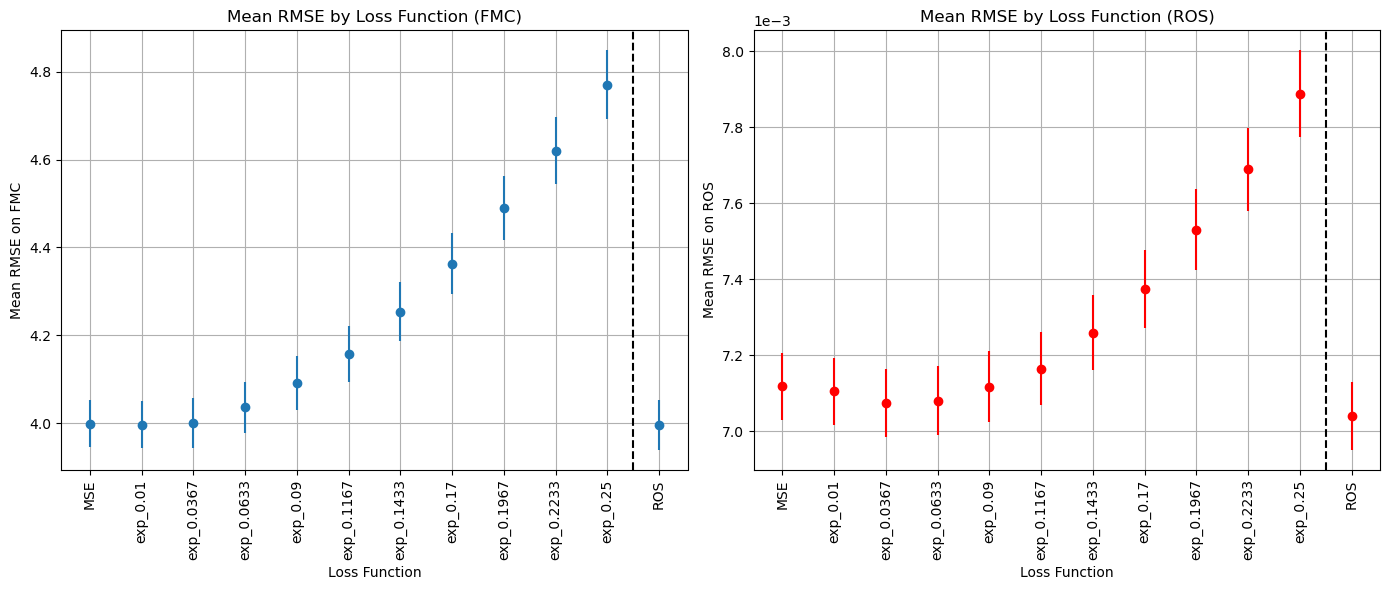

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = axes[0]
ax1.errorbar(grouped.Loss, grouped.Mean, yerr=grouped.SE, fmt='o', label='SE')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Loss Function')
ax1.set_ylabel('Mean RMSE on FMC')
ax1.set_title('Mean RMSE by Loss Function (FMC)')
ax1.tick_params(axis='x', rotation=90)
ax1.axvline(x=10.5, color='black', linestyle='--')
ax1.grid()

ax2 = axes[1]
ax2.errorbar(grouped2.Loss, grouped2.Mean, yerr=grouped2.SE, fmt='o', label='SE', color='r')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel('Loss Function')
ax2.set_ylabel('Mean RMSE on ROS')
ax2.set_title('Mean RMSE by Loss Function (ROS)')
ax2.tick_params(axis='x', rotation=90)
ax2.axvline(x=10.5, color='black', linestyle='--')
ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results1.png')
plt.show()

In [31]:
models_vec = results_ros.Model.unique()

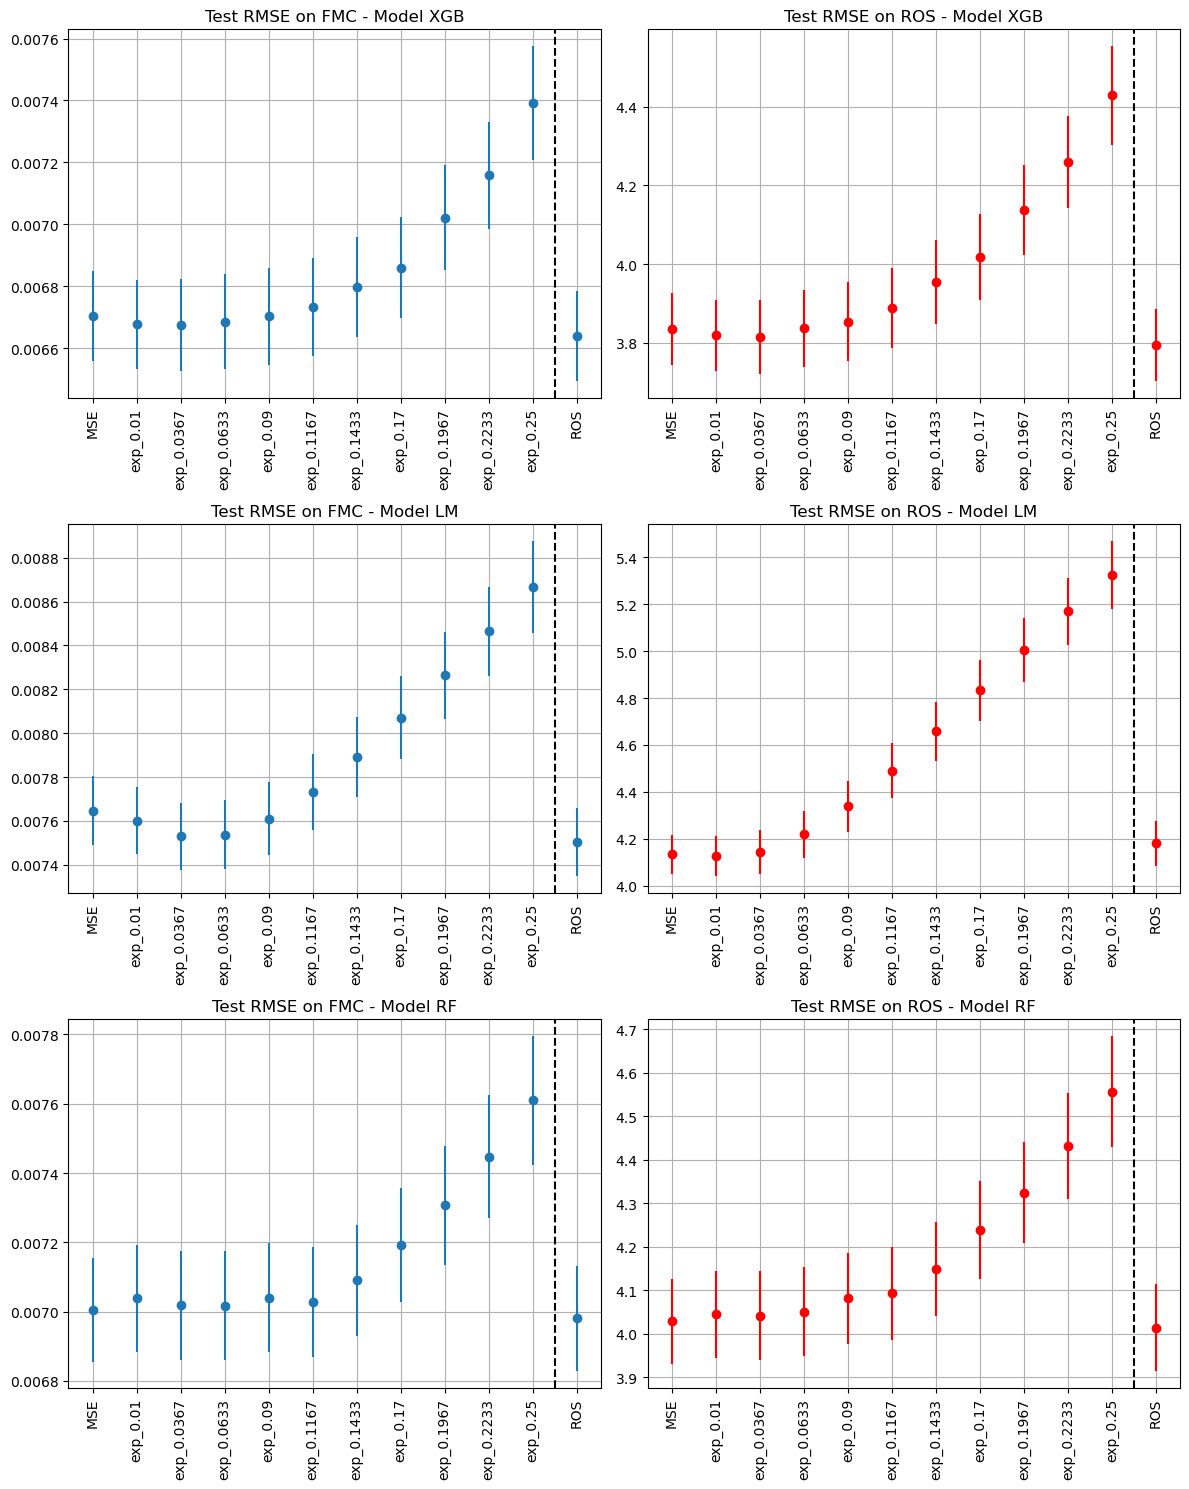

In [32]:
N = len(models_vec) # number of rows of subplots
fig, axes = plt.subplots(N, 2, figsize=(12, 5*N))

for i in range(0, len(models_vec)):
    mod = models_vec[i]
    temp = results_ros[results_ros.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax1 = axes[i, 0]
    # ax1.scatter(temp2.Loss, temp2.Mean)
    ax1.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE')
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_title(f'Test RMSE on FMC - Model {mod}')
    ax1.axvline(x=10.5, color='black', linestyle='--')
    ax1.grid()

    temp = results_fm[results_fm.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax2 = axes[i, 1]
    ax2.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE', color='r')
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_title(f'Test RMSE on ROS - Model {mod}')
    ax2.axvline(x=10.5, color='black', linestyle='--')
    ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results2.png')
plt.show()